In [19]:
import numpy as np
import pandas as pd
import yfinance
import matplotlib.pyplot as plt

stock = "CLF"

data = yfinance.download(stock,start="2016-01-01",end="2022-01-01")
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,1.570000,1.670000,1.460000,1.670000,1.581372,3577600
2016-01-05,1.670000,1.760000,1.580000,1.760000,1.666596,4497700
2016-01-06,1.720000,1.830000,1.620000,1.830000,1.732881,3949400
2016-01-07,1.780000,1.790000,1.570000,1.730000,1.638188,3974400
2016-01-08,1.700000,1.740000,1.590000,1.610000,1.524556,3374100
...,...,...,...,...,...,...
2021-12-27,20.299999,20.760000,20.139999,20.680000,20.680000,9348000
2021-12-28,20.540001,21.059999,20.360001,20.889999,20.889999,11918400
2021-12-29,20.930000,21.139999,20.690001,20.780001,20.780001,8834800


In [20]:
array = data[["Adj Close"]]
array.reset_index(inplace=True)
array.drop("Date",inplace=True,axis = 1,errors="ignore")
array


C:\Users\sedat\AppData\Local\Temp\ipykernel_23448\1662440671.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  array.drop("Date",inplace=True,axis = 1,errors="ignore")


,Adj Close
0,1.581372
1,1.666596
2,1.732881
3,1.638188
4,1.524556
...,...
1506,20.680000
1507,20.889999
1508,20.780001
1509,21.240000


In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
training_set = scaler.fit_transform(array)
training_set.shape

(1511, 1)

In [22]:
X_train = training_set[0:1258]
y_train = training_set[1:1259]
X_train

array([[0.01563794],
       [0.01907067],
       [0.02174056],
       ...,
       [0.50215227],
       [0.50577738],
       [0.53719495]])

In [23]:
X_train = np.reshape(X_train, (1258,1,1))
X_train

array([[[0.01563794]],

       [[0.01907067]],

       [[0.02174056]],

       ...,

       [[0.50215227]],

       [[0.50577738]],

       [[0.53719495]]])

In [24]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [25]:
regressor = Sequential()
regressor.add(LSTM(units=4, activation= "sigmoid", input_shape = (None,1)))
regressor.add(Dense(units=1))

In [26]:
regressor.compile(optimizer= "adam", loss= "mean_squared_error")

In [27]:
regressor.fit(X_train,y_train,batch_size=32,epochs=200)

Epoch 1/200
40/40 [==============================] - 1s 771us/step - loss: 0.0197
Epoch 2/200
40/40 [==============================] - 0s 771us/step - loss: 0.0087
Epoch 3/200
40/40 [==============================] - 0s 848us/step - loss: 0.0076
Epoch 4/200
40/40 [==============================] - 0s 823us/step - loss: 0.0074
Epoch 5/200
40/40 [==============================] - 0s 848us/step - loss: 0.0073
Epoch 6/200
40/40 [==============================] - 0s 874us/step - loss: 0.0072
Epoch 7/200
40/40 [==============================] - 0s 925us/step - loss: 0.0070
Epoch 8/200
40/40 [==============================] - 0s 848us/step - loss: 0.0068
Epoch 9/200
40/40 [==============================] - 0s 823us/step - loss: 0.0067
Epoch 10/200
40/40 [==============================] - 0s 823us/step - loss: 0.0065
Epoch 11/200
40/40 [==============================] - 0s 951us/step - loss: 0.0063
Epoch 12/200
40/40 [==============================] - 0s 900us/step - loss: 0.0061
Epoch 13/200


In [28]:
test = yfinance.download(stock,start="2022-01-01")
test

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,22.100000,22.540001,21.680000,21.730000,21.730000,16604500
2022-01-04,22.000000,22.790001,21.750000,22.620001,22.620001,22418700
2022-01-05,23.000000,24.670000,22.990000,23.790001,23.790001,39809100
2022-01-06,24.070000,24.209999,23.200001,23.299999,23.299999,19087600
2022-01-07,23.530001,23.910000,23.010000,23.340000,23.340000,13610500
...,...,...,...,...,...,...
2022-12-29,16.420000,16.650000,16.129999,16.490000,16.490000,10539600
2022-12-30,16.309999,16.500000,15.930000,16.110001,16.110001,7486300
2023-01-03,16.330000,17.290001,16.309999,16.790001,16.790001,13878400


In [29]:
test = test[["Adj Close"]]
test.reset_index(inplace=True)
test.drop("Date",inplace=True,axis = 1,errors="ignore")
test

C:\Users\sedat\AppData\Local\Temp\ipykernel_23448\3654597049.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop("Date",inplace=True,axis = 1,errors="ignore")


,Adj Close
0,21.730000
1,22.620001
2,23.790001
3,23.299999
4,23.340000
...,...
249,16.490000
250,16.110001
251,16.790001
252,17.200001


In [30]:
test = scaler.transform(test)
test

array([[0.82720331],
       [0.86305162],
       [0.91017798],
       [0.89044123],
       [0.89205243],
       [0.86425994],
       [0.84613446],
       [0.8811771 ],
       [0.84653718],
       [0.84009256],
       [0.78128534],
       [0.73939521],
       [0.7095888 ],
       [0.63587834],
       [0.64111465],
       [0.63064211],
       [0.60687753],
       [0.60486354],
       [0.62339189],
       [0.64232297],
       [0.69428284],
       [0.71200559],
       [0.70717209],
       [0.71200559],
       [0.71724182],
       [0.75228453],
       [0.78571605],
       [0.79578578],
       [0.71401951],
       [0.69589395],
       [0.74825662],
       [0.75188173],
       [0.72449204],
       [0.72086693],
       [0.72489484],
       [0.70676929],
       [0.73335338],
       [0.81834197],
       [0.85257908],
       [0.89044123],
       [0.90333056],
       [0.97542982],
       [0.99718049],
       [1.00161112],
       [0.90574727],
       [0.94723453],
       [1.01691716],
       [0.993

In [31]:
X_test = test[0:253]
y_test = test[1:254]
X_test

array([[0.82720331],
       [0.86305162],
       [0.91017798],
       [0.89044123],
       [0.89205243],
       [0.86425994],
       [0.84613446],
       [0.8811771 ],
       [0.84653718],
       [0.84009256],
       [0.78128534],
       [0.73939521],
       [0.7095888 ],
       [0.63587834],
       [0.64111465],
       [0.63064211],
       [0.60687753],
       [0.60486354],
       [0.62339189],
       [0.64232297],
       [0.69428284],
       [0.71200559],
       [0.70717209],
       [0.71200559],
       [0.71724182],
       [0.75228453],
       [0.78571605],
       [0.79578578],
       [0.71401951],
       [0.69589395],
       [0.74825662],
       [0.75188173],
       [0.72449204],
       [0.72086693],
       [0.72489484],
       [0.70676929],
       [0.73335338],
       [0.81834197],
       [0.85257908],
       [0.89044123],
       [0.90333056],
       [0.97542982],
       [0.99718049],
       [1.00161112],
       [0.90574727],
       [0.94723453],
       [1.01691716],
       [0.993

In [32]:
X_test = np.reshape(X_test, (253,1,1))
X_test

array([[[0.82720331]],

       [[0.86305162]],

       [[0.91017798]],

       [[0.89044123]],

       [[0.89205243]],

       [[0.86425994]],

       [[0.84613446]],

       [[0.8811771 ]],

       [[0.84653718]],

       [[0.84009256]],

       [[0.78128534]],

       [[0.73939521]],

       [[0.7095888 ]],

       [[0.63587834]],

       [[0.64111465]],

       [[0.63064211]],

       [[0.60687753]],

       [[0.60486354]],

       [[0.62339189]],

       [[0.64232297]],

       [[0.69428284]],

       [[0.71200559]],

       [[0.70717209]],

       [[0.71200559]],

       [[0.71724182]],

       [[0.75228453]],

       [[0.78571605]],

       [[0.79578578]],

       [[0.71401951]],

       [[0.69589395]],

       [[0.74825662]],

       [[0.75188173]],

       [[0.72449204]],

       [[0.72086693]],

       [[0.72489484]],

       [[0.70676929]],

       [[0.73335338]],

       [[0.81834197]],

       [[0.85257908]],

       [[0.89044123]],

       [[0.90333056]],

       [[0.97542

In [33]:
predictions = regressor.predict(X_test)
predictions = scaler.inverse_transform(predictions)
predictions

8/8 [==============================] - 0s 716us/step


array([[20.195593 ],
       [20.859257 ],
       [21.705008 ],
       [21.354504 ],
       [21.383318 ],
       [20.881325 ],
       [20.54825  ],
       [21.188143 ],
       [20.555698 ],
       [20.43623  ],
       [19.320024 ],
       [18.496588 ],
       [17.896566 ],
       [16.363691 ],
       [16.474838 ],
       [16.252213 ],
       [15.742064 ],
       [15.69852  ],
       [16.097298 ],
       [16.500437 ],
       [17.583952 ],
       [17.945648 ],
       [17.847408 ],
       [17.945648 ],
       [18.051731 ],
       [18.75244  ],
       [19.40575  ],
       [19.599594 ],
       [17.986492 ],
       [17.617002 ],
       [18.672722 ],
       [18.744474 ],
       [18.198027 ],
       [18.12497  ],
       [18.206137 ],
       [17.839207 ],
       [18.375902 ],
       [20.028847 ],
       [20.667189 ],
       [21.354504 ],
       [21.58401  ],
       [22.825867 ],
       [23.186573 ],
       [23.259264 ],
       [21.62679  ],
       [22.348686 ],
       [23.508326 ],
       [23.12

In [34]:
real_price = yfinance.download(stock,start="2022-01-01")
real_price = real_price[["Adj Close"]]
real_price.reset_index(inplace=True)
real_price.drop("Date",inplace=True,axis = 1,errors="ignore")
real_price

[*********************100%***********************]  1 of 1 completed


C:\Users\sedat\AppData\Local\Temp\ipykernel_23448\665426376.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_price.drop("Date",inplace=True,axis = 1,errors="ignore")


,Adj Close
0,21.730000
1,22.620001
2,23.790001
3,23.299999
4,23.340000
...,...
249,16.490000
250,16.110001
251,16.790001
252,17.200001


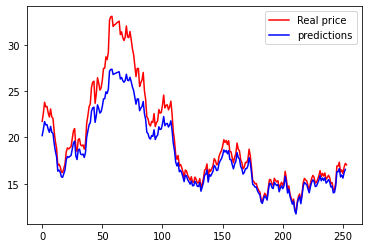

In [35]:
plt.plot(real_price,color="red",label="Real price")
plt.plot(predictions,color="blue",label="predictions")
plt.legend()